In [1]:
import requests
import json
from pprint import pprint
import random
import pandas as pd
import matplotlib.pyplot as plt
import gmaps

from citipy import citipy
from api_keys import api_key

In [2]:
latitudes = []
longitudes =[]
coordinates = []

In [3]:
# Get random coordinates from each quadrant.

#1st quadrant
latitudes = [random.uniform(0, 90) for x in range(150)]  
longitudes = [random.uniform(0, -180) for x in range(150)]
first_coordinates = list(zip(latitudes, longitudes))

#2nd quadrant
latitudes = [random.uniform(0, 90) for x in range(150)]
longitudes = [random.uniform(0, 180) for x in range(150)]
second_coordinates =(list(zip(latitudes, longitudes)))

#3rd quadrant
latitudes = [random.uniform(0, -90) for x in range(150)]
longitudes = [random.uniform(0, -180) for x in range(150)]
third_coordinates = list(zip(latitudes, longitudes))
              
#4th quadrant
latitudes = [random.uniform(0, -90) for x in range(150)]
longitudes = [random.uniform(0, 180) for x in range(150)]
fourth_coordinates = list(zip(latitudes, longitudes))
 
coordinates = first_coordinates + second_coordinates + third_coordinates + fourth_coordinates

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

In [5]:
non_repeat_city_list = {}

temperature_list = []
humidity_list = []
cloudiness_list = []
city_list = []
country_list = []
wind_speed_list = []
latitude_list = []
longitude_list = []

In [6]:
# Pass coordinates to citipy to find closest city.
num_processed = 0
num_cities_not_processed = 0

for lat, lon in coordinates:
    nearest_city = citipy.nearest_city(lat, lon)
    
    city = nearest_city.city_name
    country = nearest_city.country_code
    
    if city == '':
        print("City not found. Skipping city")
        num_cities_not_processed += 1
        continue
    
    if city not in non_repeat_city_list:
        query_url = f"{url}APPID={api_key}&units={unit}&q={city}&country={country}"
        response = requests.get(query_url).json()
        
        if 'id' not in response:
            print("City not found. Skipping city")
            num_cities_not_processed += 1
            continue
        
        num_processed += 1
        city_number = response['id']
        print(f"Request {num_processed} - city#: {city_number}; city: {city}, country: {country}")
              
        # Capture city info from openweathermap, as well as actual latitude and longitude of closest city.
        temperature = response['main']['temp']
        temperature_list.append(temperature)
        
        humidity = response['main']['humidity']
        humidity_list.append(humidity)
        
        cloudiness = response['clouds']['all']
        cloudiness_list.append(cloudiness)
        
        wind_speed = response['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        actual_latitude = response['coord']['lat']
        latitude_list.append(actual_latitude)
        
        actual_longitude = response['coord']['lon']
        longitude_list.append(actual_longitude)
        
        city_list.append(city.title())
        country_list.append(country.upper())
        
        non_repeat_city_list[city] = country, temperature, humidity, cloudiness, wind_speed, actual_latitude, actual_longitude

Request 1 - city#: 5572400; city: susanville, country: us
Request 2 - city#: 3372472; city: vila franca do campo, country: pt
Request 3 - city#: 5369568; city: madera, country: mx
Request 4 - city#: 5961417; city: husavik, country: is
City not found. Skipping city
Request 5 - city#: 6185377; city: yellowknife, country: ca
Request 6 - city#: 5848280; city: kapaa, country: us
Request 7 - city#: 3424607; city: tasiilaq, country: gl
Request 8 - city#: 5882953; city: aklavik, country: ca
Request 9 - city#: 4407665; city: kodiak, country: us
Request 10 - city#: 6324729; city: halifax, country: ca
Request 11 - city#: 262462; city: saint george, country: bm
Request 12 - city#: 5367788; city: lompoc, country: us
Request 13 - city#: 4944903; city: nantucket, country: us
Request 14 - city#: 3831208; city: qaanaaq, country: gl
Request 15 - city#: 3372707; city: ribeira grande, country: pt
Request 16 - city#: 5919850; city: chapais, country: ca
Request 17 - city#: 6167817; city: torbay, country: ca

Request 132 - city#: 1510689; city: baykit, country: ru
Request 133 - city#: 1165638; city: shahdadkot, country: pk
City not found. Skipping city
City not found. Skipping city
Request 134 - city#: 2084442; city: vanimo, country: pg
Request 135 - city#: 2121025; city: srednekolymsk, country: ru
Request 136 - city#: 352733; city: marsa matruh, country: eg
Request 137 - city#: 2027044; city: batagay, country: ru
City not found. Skipping city
Request 138 - city#: 2110227; city: butaritari, country: ki
Request 139 - city#: 259265; city: koroni, country: gr
Request 140 - city#: 1684803; city: tabuk, country: sa
Request 141 - city#: 1272473; city: dod ballapur, country: in
Request 142 - city#: 2094342; city: kavieng, country: pg
Request 143 - city#: 2013918; city: ust-maya, country: ru
Request 144 - city#: 415189; city: aden, country: ye
Request 145 - city#: 2112802; city: hasaki, country: jp
Request 146 - city#: 2027296; city: aykhal, country: ru
Request 147 - city#: 2249901; city: gat, coun

Request 267 - city#: 2155562; city: nelson bay, country: au
Request 268 - city#: 1072879; city: ankazoabo, country: mg
Request 269 - city#: 2067089; city: maningrida, country: au
Request 270 - city#: 6355222; city: yulara, country: au
Request 271 - city#: 926747; city: mchinji, country: mw
Request 272 - city#: 1282256; city: hithadhoo, country: mv
City not found. Skipping city
Request 273 - city#: 3356832; city: henties bay, country: na
Request 274 - city#: 1622318; city: waingapu, country: id
Request 275 - city#: 2136825; city: isangel, country: vu
City not found. Skipping city
City not found. Skipping city
Request 276 - city#: 2206808; city: wairoa, country: nz
Request 277 - city#: 4501427; city: port elizabeth, country: za
Request 278 - city#: 2396518; city: port-gentil, country: ga
Request 279 - city#: 934649; city: cap malheureux, country: mu
City not found. Skipping city
Request 280 - city#: 3573739; city: esperance, country: au
Request 281 - city#: 2144528; city: warrnambool, co

In [7]:
city_df = pd.DataFrame({
    "City": city_list,
    "Country": country_list,
    "Temperature": temperature_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Latitude": latitude_list,
    "Longitude": longitude_list
})
city_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Susanville,US,46.09,36,90,17.22,40.42,-120.65
1,Vila Franca Do Campo,PT,57.67,87,75,25.28,37.72,-25.43
2,Madera,MX,67.21,35,20,6.93,36.96,-120.06
3,Husavik,IS,48.61,71,80,11.01,50.56,-96.99
4,Yellowknife,CA,23.88,68,90,10.29,62.45,-114.38


In [8]:
print(len(city_df))
print("Num Cities Not Processed, off 600 lats/longs: ", num_cities_not_processed)

302
Num Cities Not Processed, off 600 lats/longs:  43


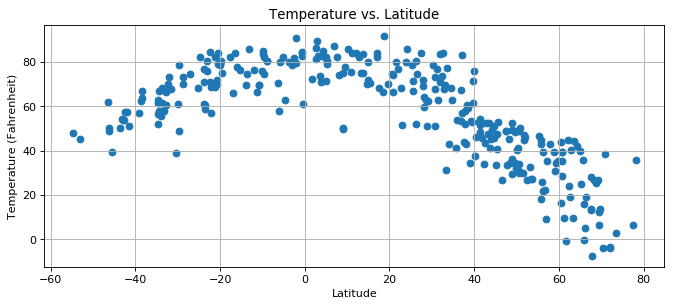

In [9]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Temperature'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("Temperature vs. Latitude")
plt.savefig("Temp vs Latitude.png")
plt.grid()

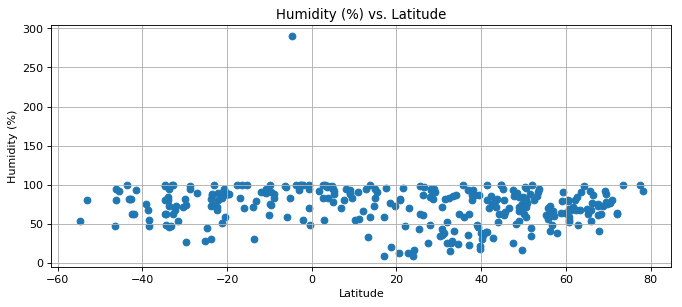

In [10]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Humidity'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")
plt.savefig("Humidity vs Latitude.png")
plt.grid()

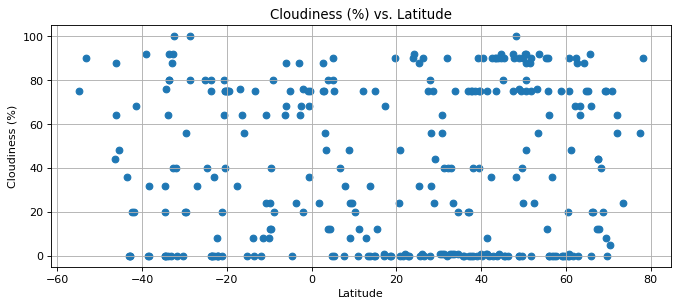

In [11]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")
plt.savefig("Cloudiness vs Latitude.png")
plt.grid()

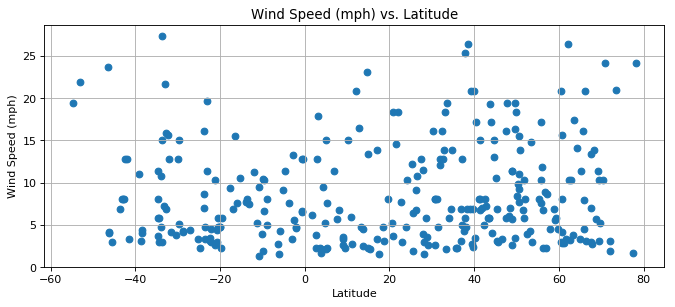

In [12]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")
plt.savefig("Wind Speed vs Latitude.png")
plt.grid()

## 3 Observable Trends

### 1. 

### 2. 

### 3.